#### ---------------------------------- Debugging ----------------------------------------------
    
    Python's built-in debugger, "pdb", is a mature and capable one that can help us to debug the code. The purpose of a debugger is to provide you with a slow-motion button to control the flow of a program. It also allows you to freeze the program at a certain time and examine the state.
    
    Important debugging operations are:
        1. Step into
        2. Breakpoint
        3. Continue
        4.
    
    The simplest operation under a debugger is to "step" through the code. That is to run one line of code at a time and wait for your acknowledgment before proceeding to the next. The reason we want to run the program in a stop-and-go fashion is to allow us to check the logic and value or verify the algorithm.
    
    For a larger program, we may not want to step through the code from the beginning as it may take a long time before we reach the line that we are interested in. Therefore, debuggers also provide a "breakpoint" feature that will kick in when a specific line of code is reached. From that point onward, we can step through it line by line.

#### -------------------------------------------- pdb in action ------------------------------------------

MovieWriter imagemagick unavailable; using Pillow instead.


PSO found best solution at f([3.18541756 3.12972478])=-1.8083516042208303
Global optimal at f([3.1818181818181817, 3.131313131313131])=-1.8082706615747688


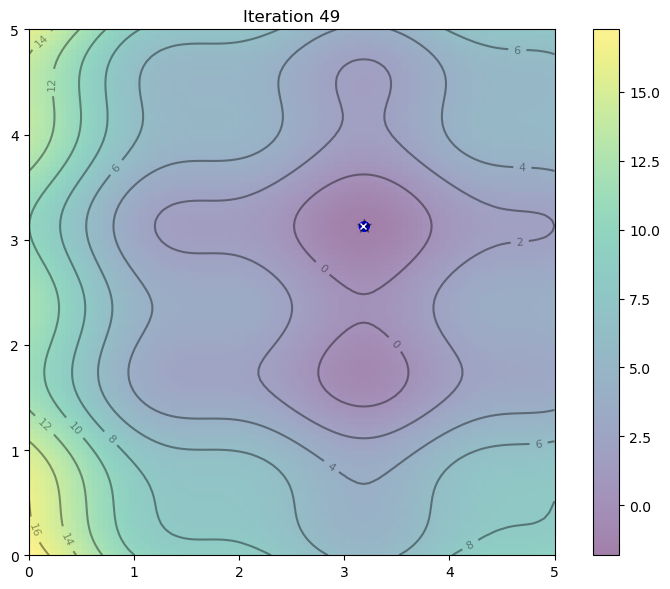

In [1]:
#Python code for showing the particle swarm optimization in an animation:

#particle swarm optimization is a computational method 
#that optimizes a problem by iteratively trying to improve a candidate solution with regard to a given measure of quality
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
def f(x, y):
    "Objective function"
    return (x - 3.14)**2 + (y - 2.72)**2 + np.sin(3 * x + 1.41) + np.sin(4 * y - 1.73)
 
# Compute and plot the function in 3D within [0, 5]x[0, 5]
x, y = np.array(np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100)))
z = f(x, y)
 
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
 
# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8
 
# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1
 
# Initialize data - pbest and gbest
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()
 
def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1 * r1 * (pbest - X) + c2 * r2 * (gbest.reshape(-1, 1) - X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
 
# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])
 
def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot
 
anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save("PSO.gif", dpi=120, writer="imagemagick")
 
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))


    The particle swarm optimization is done by executing the update() function a number of times. Each time it runs, we are closer to the optimal solution to the objective function. We are using matplotlib’s FuncAnimation() function instead of a loop to run update(), so we can capture the position of the particles at each iteration.
    
    Note: Save the above cell as pso.py and execute the py file to see the debugger in action from the terminal or visual studio code
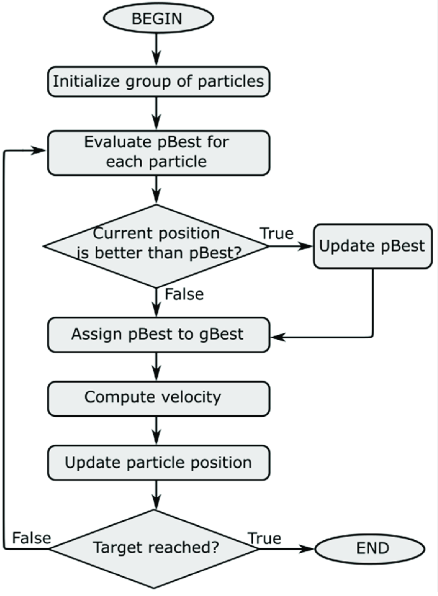

#### How to run the python file using pdb module to debug ?

    Usually we run this program which will be saved by pso.py as "python pso.py" in the terminal.
    
    But to enable the pdb debugger to debug the code
    -------------
      First way:
    -------------
        we will run as "python -m pdb pso.py" in the terminal. 
        The -m pdb part will load the pdb module and let the module execute the file pso.py for you. 
        When you run this command, you will be welcomed with the pdb prompt. 
        At the prompt, you can type in the debugger commands.
    --------------
    Commands:
    --------------
        -> To show the list of supported commands, we can use "h". 
        -> To show the details of the specific command (such as list), we can use "h list":
        -> We can use "n" to move to the next line
        -> "s" to step into a function and we can use s to get to the next line in that function
        -> In pdb, the line of code will be printed before the prompt.
        -> Usually, the n command is what we would prefer as it executes that line of code and moves the flow at the same level without drilling down deeper.
        -> When we are at a line that calls a function (such as line 11 of the above program, that runs z = f(x, y)), we can use s to step into the function.
        -> If the program is long, it is quite boring to use the n command many times to move to somewhere we are interested. We can use the until command with a line number to let the debugger run the program until that line is reached
        -> A command similar to until is return, which will execute the current function until the point that it is about to return. You can consider that as until with the line number equal to the last line of the current function.
        -> The until command is a one-off, meaning it will bring you to that line only. If you want to stop at a particular line whenever it is being run, we can make a breakpoint on it
        -> After we set a breakpoint with the b command, we can let the debugger run our program until the breakpoint is hit. 
        -> The c command means to continue until a breakpoint trigger is met. 
        -> At any point, we can use the bt command to show the traceback to check how we reached that point
        -> We can also use the p command to print the variables (or an expression) to check what value they are holding. p var11
         p var1, var2 or p exp
        -> Indeed, we can place a breakpoint with a condition so that it will stop only if the condition is met. The below will impose a condition that the first random number (r1) is greater than 0.5: b 40, r>0.5
        -> Indeed, we can also try to manipulate variables while we are debugging. r=40
        -> we use the l command to list the code around the current statement (identified by the arrow ->)
        -> In the listing, we can also see the breakpoints if present (marked with B)
        -> We can manipulate the values in run time when the code is executing in debug mode
            For eg, we can see the current value of V and r1, we can modify r1 from 0.54 to 0.2 by specifying r=0.2 and run the statement on V again by using j 38 (jump) to line 38. After that we execute the statement with the n command, the value of V will be changed.
        -> If we use a breakpoint and find something unexpected, chances are that it was caused by issues in a different level of the call stack. Debuggers allow you to navigate to different levels
        -> The up command moves our focus to one level up on the call stack and we can see the change in focus by using the list command l and the p command can examine a variable in that different scope.
        -> d(own) Down one level in the stack trace
        -> When we step using s into function and if we want to continue the execution until the function last statement (return statement) instead of going to each and every line in that function, we can use r(eturn) to run execution to the end of the current function and then stop, which almost steps out of the current function. Then enter n(ext) once to complete the step out, returning to the caller.
        -> To terminate the debugger, we can use the q command to quit or hit Ctrl-D if your terminal supports it(which also terminates the program)
        -> b file:line_number Set a breakpoint in a file at a specific line
        -> b func Set a breakpoint at the first line of a function
        -> disable number Disable breakpoint number
        -> enable number Enable breakpoint number
        -> clear number Remove breakpoint number
        -> w(here) Print current position and stack trace
        -> a(rgs) Print the arguments of the current function
        
    ---------------    
    Second way
    ---------------
        To add the below statements in the program python file directly
        import pdb
        pdb.set_trace() #begin the debugger at this line when the file is run normally
        

#### Debugging in visual studio code
    The buttons at the center top correspond to the pdb commands continue, next, step, return, restart, and quit, respectively.
    In the IDE, if you hover, the same commands are written as continue, stepover, stepinto, stepout, restart, stop respectively.
    Shorts cuts are:
    f5 - continue
    f10 - step over
    f11 - step into
    shift + f11 - step out
    restart - cntrl + shft + f5
    stop - shift + f5
    
     A breakpoint can be created by clicking on the line number, and a red dot will be appeared to identify that. The bonus of using an IDE is that the variables are shown immediately at each debugging step. We can also watch for an express and show the call stack. These are on the left side of the screen
    
    

#### Using GDB on a running Python program
    The pdb from Python is suitable only for programs running from scratch. If we have a program already running but is stuck, we cannot use pdb to hook into it to check what’s going on. The Python extension from GDB, however, can do this.
    
    GDB is supposed to be a debugger for compiled programs (usually from C or C++). The Python extension allows you to check the code (written in Python) being run by the Python interpreter (written in C). It is less feature-rich than Python’s PDB in terms of handling Python code but valuable when you need to hook it into a running process.

    The commands supported under GDB are py-list, py-bt, py-up, py-down, and py-print. They are comparable to the same commands in pdb without the py- prefix.

    GDB is useful if your Python code uses a library compiled from C (such as numpy), and you want to investigate how it runs. It is also helpful to learn why your program is frozen by checking the call stack in run time. However, it may be rare that you need to use GDB to debug your machine learning project.

    To demonstrate, let’s consider a GUI application. It will wait until the user’s action before the program can end. Hence it is a perfect example of how we can use gdb to hook into a running process
    
    Procedure:
        -> Get the process id(first column) of the program which is currently stuck and running 
                ps -ef | grep python
         -> Run the gdb with that acquired process id and it will bring you into the GDB’s prompt
                 gdb python processid
         -> Then we use the commands just like in pdb     
                py-bt
                

#### ----------------------------------------- Debugging Jupyter notebooks -----------------------------------
    
    1. The built-in Python debugger pdb works just fine in a Jupyter notebook.
        With import pdb; pdb.set_trace() #at the the line where we want to debug
        We can enter the debugger and get a little interactive prompt
        In the debugger we can then print our variables, evaluate code to inspect the current stack, etc
    2. With IPython.core.debugger
         from IPython.core.debugger import set_trace
         set_trace()  at the line where we want to debug


In [7]:
import pdb
def debuginnotebook(x):
    answer = 42
    pdb.set_trace()
    answer += x
    return answer

debuginnotebook(12)

> c:\users\malla\appdata\local\temp\ipykernel_1332\585875431.py(5)debuginnotebook()

ipdb> answer
42
ipdb> x
12
ipdb> n
> c:\users\malla\appdata\local\temp\ipykernel_1332\585875431.py(6)debuginnotebook()

ipdb> n
--Return--
54
> c:\users\malla\appdata\local\temp\ipykernel_1332\585875431.py(6)debuginnotebook()

ipdb> c


54

In [8]:
from IPython.core.debugger import set_trace
def debuginnotebook(x):
    answer = 42
    set_trace()
    answer += x
    return answer

debuginnotebook(12)

> c:\users\malla\appdata\local\temp\ipykernel_1332\2233435227.py(5)debuginnotebook()

ipdb> answer
42
ipdb> x
12
ipdb> n
> c:\users\malla\appdata\local\temp\ipykernel_1332\2233435227.py(6)debuginnotebook()

ipdb> bt
    [... skipping 21 hidden frame(s)]

  c:\users\malla\appdata\local\temp\ipykernel_1332\2233435227.py(8)<cell line: 8>()

> c:\users\malla\appdata\local\temp\ipykernel_1332\2233435227.py(6)debuginnotebook()

ipdb> b
ipdb> l
      1 from IPython.core.debugger import set_trace
      2 def debuginnotebook(x):
      3     answer = 42
      4     set_trace()
      5     answer += x
----> 6     return answer
      7 
      8 debuginnotebook(12)

ipdb> n
--Return--
54
> c:\users\malla\appdata\local\temp\ipykernel_1332\2233435227.py(6)debuginnotebook()

ipdb> c


54

### ------------------------------ Profiling ----------------------------------------
    Profiling is a technique to figure out how time is spent in a program. With these statistics, we can find the “hot spot” of a program and think about ways of improvement. Sometimes, a hot spot in an unexpected location may hint at a bug in the program as well.
    
    - We use timeit module for profiling small code fragments
    - We can profile the entire program using the cProfile module
    - We can also invoke a profiler inside an existing program
    
    When you are asked about the different ways of doing the same thing in Python, one perspective is to check which one is more efficient. In such cases profiling is our best bet.

In [58]:
#timeit module

#String concatenation using join() and "+" operator
longstr = ""
for x in range(1000):
    longstr += str(x)
    
longstrjoin = "".join([str(x) for x in range(1000)])

#if we want to check the execution of both of the above concatenation operations, then we have to run in the terminal as below
#        python -m timeit 'longstr=\"\"' 'for x in range(1000): longstr += str(x)'
#        python -m timeit '\"\".join([str(x)] for x in range(1000))' 
#These two commands will produce the following output:
#    1000 loops, best of 5: 296 usec per loop
#    2000 loops, best of 5: 145 usec per loop
#from the result, it is evident that join concatenation is faster compared to + operator

#the first one can also be rewritten as 
#  python -m timeit 'longstr=\"\"' 'for x in range(1000):' ' longstr += str(x)'
# This takes 1000 loops, best of 5: 352 usec per loop

#While it is true that the join function is faster than the + operator for string concatenation, 
#the timing above is not a fair comparison.
#It is because we use str(x) to make short strings on the fly during the loop. The better way to do this is the following:

#    python -m timeit -s 'strings = [str(x) for x in range(1000)]' 'longstr=\"\"' 'for x in strings:' ' longstr += str(x)'
#    python -m timeit -s 'strings = [str(x) for x in range(1000)]' '\"\".join(strings)'

#This produces: 1000 loops, best of 5: 245 usec per loop for + operator
# 50000 loops, best of 5: 5.05 usec per loop


#The -s option allows us to provide the “setup” code, which is executed before the profiling and not timed.
#In the above, we create the list of short strings before starting the loop. 
#Hence the time to create those strings is not measured in the “per loop” timing. 
#The above shows that the join() function is two orders of magnitude faster than the + operator.
#The more common use of the -s option is to import the libraries.
#For example, we can compare the square root function from Python’s math module from NumPy and use the exponential operator ** as follows:

#python -m timeit '[x**0.5 for x in range(1000)]' gives 2000 loops, best of 5: 147 usec per loop
#python -m timeit -s 'from math import sqrt' '[sqrt(x) for x in range(1000)]' gives 5000 loops, best of 5: 99.4 usec per loop
#python -m timeit -s 'from numpy import sqrt' '[sqrt(x) for x in range(1000)]' gives 500 loops, best of 5: 794 usec per loop

#If you wonder why NumPy is the slowest, it is because NumPy is optimized for arrays. You will see its exceptional speed in the following alternative:
    #python -m timeit -s 'import numpy as np; x=np.array(range(1000))' 'np.sqrt(x)' gives 100000 loops, best of 5: 2.11 usec per loop

#### Note:
    The output of timeit is to find the best performance among multiple runs (default to be 5). Each run is to run the provided statements a few times (which is dynamically determined). The time is reported as the average to execute the statements once in the best run.

In [10]:
#If you prefer, you can also run timeit in Python code. 
#For example, the following will be similar to the above but give you the total raw timing for each run

import timeit
measurements = timeit.repeat('[x**0.5 for x in range(1000)]', number=10000)
print(measurements)

#In the above, each run is to execute the statement 10,000 times
#the result is as follows. You can see the result of roughly 1.7 usec per loop in the best run

[1.6368418999991263, 1.6462179999998625, 1.8131651999992755, 1.774449000000459, 1.8596990000005462]


#### ------------------------------------- cProfile module --------------------------------------------
    Focusing on a statement or two for performance is from a microscopic perspective. Chances are, we have a long program and want to see what is causing it to run slow. That happens before we can consider alternative statements or algorithms.

    A program running slow can generally be due to two reasons: A part is running slow, or a part is running too many times, adding up and taking too much time. We call these “performance hogs” the hot spot.
    
    Consider the following program that uses a hill-climbing algorithm to find hyperparameters(alpha, eta) for a perceptron model
    
    Hill climbing is a mathematical optimization algorithm, which means its purpose is to find the best solution to a problem which has a (large) number of possible solutions.
    
    In the Travelling salesman problem, we have a salesman who needs to visit a number of cities exactly once, after which he returns to the first city. The distances between each pair of cities are known, and we need to find the shortest route. As you can imagine, there is (often) a large number of possible solutions (routes) to a specific Travelling salesman problem; the goal is to find the best (i.e. the shortest) solution. Hill climbing tries to find the best solution to the problem by starting out with a random solution, and then generate neighbours: solutions that only slightly differ from the current one. If the best of those neighbours is better (i.e. shorter) than the current one, it replaces the current solution with this better solution. It then repeats the pattern by again creating neighbours. If at some point no neighbour is better than the current solution, it returns the then current solution. That’s it! The algorithm is quite simple, but it needs to be said that it doesn’t always find the best solution. It can get stuck in a local maximum: a place where the current solution isn’t the best solution to the problem, but where none of the direct neighbours of the current solution are better than the current solution. As described, the algorithm will stop at such a point, unfortunately without returning the best solution. More complicated algorithms exist that have a higher chance of finding the best solution, but they often take more computational resources.

In [8]:
#program that uses a hill-climbing algorithm to find hyperparameters(alpha, eta) for a perceptron model
#manually search hyperparameters of perceptron
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from numpy.random import rand, randn
from numpy import mean


def obj_func(X, y, cfg):
    #unpacking the hyperparameters
    eta, alpha = cfg
    model = Perceptron(penalty='elasticnet', alpha=alpha, eta0=eta)
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)
    #evaluate the model
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    acc_score = mean(scores)
    return acc_score

def step(currhyperparams, step_size):
    #unpack the current hyper parameters
    curr_eta , curr_alpha = currhyperparams
    #step eta
    new_eta = curr_eta + randn() * step_size
    #check the bounds of eta
    if new_eta < 0.0:
        new_eta = 1e-8 
    if new_eta > 1.0:
        new_eta = 1.0
    #new_eta = (1e-8, new_eta)[if new_eta <= 0]() using ternary operator :p
    #step alpha
    new_alpha = curr_alpha + randn() * step_size
    #check the bounds of alpha
    if new_alpha < 0.0:
        new_alpha = 0.0 
    #returning the new hyperparameters
    return [new_eta, new_alpha]

def hill_climbing(X, y, objfunc, n_iter, step_size):
    '''
    Hill Climbing local search algorithm
    '''
    #starting point for search
    solution_hyperparams = [rand(), rand()]
    # evaluate the initial accuracy point
    curr_obj_acc_score = obj_func(X, y, solution_hyperparams)
    #run the hill climbing algorithm
    for i in range(n_iter):
        # take a step
        new_candidate_params = step(solution_hyperparams, step_size)
        #evaluate the new candidate
        new_obj_acc_score = obj_func(X, y, new_candidate_params)
        #check if we should keep the new point
        if new_obj_acc_score >= curr_obj_acc_score:
            # store the new point
            curr_obj_acc_score, solution_hyperparams = new_obj_acc_score, new_candidate_params
            # report progress
            print(">%d, hyperparameters=%s, score=%.3f" % (i, solution_hyperparams, curr_obj_acc_score))
    return [solution_hyperparams, curr_obj_acc_score]

#define the dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=1, random_state=1)
#defining the number of iterations
n_iter = 100
#defining the step size/learning rate
step_size = 0.1
#perform the hill climbing
config, mean_score = hill_climbing(X, y, obj_func, n_iter, step_size)
print('Done!')
print(f"The hyperparmeter chosen using hill climbing are {config}"
     f"and the maximum accuracy reported is {mean_score:.3f}")


>2, hyperparameters=[0.21485066764881708, 0.2984776703489973], score=0.753
>7, hyperparameters=[0.10536381869291137, 0.2637422439802748], score=0.777
>12, hyperparameters=[0.03753872790290928, 0.2615409972754696], score=0.780
>14, hyperparameters=[0.05904553260374849, 0.2088711770109846], score=0.794
>27, hyperparameters=[0.2171115155449299, 0.04040053549511044], score=0.798
>34, hyperparameters=[0.22054037607954002, 0.007009542425053125], score=0.800
>41, hyperparameters=[0.18510834885130234, 0.16927299022846143], score=0.800
>66, hyperparameters=[0.239098336552805, 0.11975325278956457], score=0.802
>92, hyperparameters=[0.17024424678702405, 0.04744727403584385], score=0.804
Done!
The hyperparmeter chosen using hill climbing are [0.17024424678702405, 0.04744727403584385]and the maximum accuracy reported is 0.804


    -------------------------------------------------------------------------------------------------------------
    Assume we saved this program in the file hillclimb.py, we can run the profiler in the command line as follows:
                    "python -m cProfile hillclimb.py"
     The o/p of it will be: original o/p of the program followed by the stats      
                >17, cfg=[0.49105438202347707, 0.1342150084854657] 0.79833
                >26, cfg=[0.5737524712834843, 0.016749795596210315] 0.80033
                >47, cfg=[0.5067828976025809, 0.05280380038497864] 0.80133
                >48, cfg=[0.5427345321546029, 0.0049895870979695875] 0.81167
                Done!
                cfg=[0.5427345321546029, 0.0049895870979695875]: Mean Accuracy: 0.811667
         2686451 function calls (2638255 primitive calls) in 5.500 seconds
 
       Ordered by: standard name

       ncalls  tottime  percall  cumtime  percall filename:lineno(function)
          101    0.001    0.000    4.892    0.048 hillclimb.py:11(objective)
            1    0.000    0.000    5.501    5.501 hillclimb.py:2(<module>)
          100    0.000    0.000    0.001    0.000 hillclimb.py:25(step)
            1    0.001    0.001    4.894    4.894 hillclimb.py:44(hillclimbing)
            1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(<module>)
          303    0.000    0.000    0.008    0.000 <__array_function__ internals>:2(all)
          303    0.000    0.000    0.005    0.000 <__array_function__ internals>:2(amin)
            2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(any)
            4    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_1d)
         3333    0.003    0.000    0.018    0.000 <__array_function__ internals>:2(bincount)
          103    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(concatenate)
            3    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(copyto)
          606    0.001    0.000    0.010    0.000 <__array_function__ internals>:2(cumsum)
            6    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(dot)
            1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(empty_like)
            1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(inv)
            2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(linspace)
            1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(lstsq)
          101    0.000    0.000    0.005    0.000 <__array_function__ internals>:2(mean)
            2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(ndim)
            1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(outer)
            1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(polyfit)
            1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(polyval)
            1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(prod)
          303    0.000    0.000    0.002    0.000 <__array_function__ internals>:2(ravel)
            2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(result_type)
          303    0.001    0.000    0.001    0.000 <__array_function__ internals>:2(shape)
          303    0.000    0.000    0.035    0.000 <__array_function__ internals>:2(sort)
            4    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(trim_zeros)
         1617    0.002    0.000    0.112    0.000 <__array_function__ internals>:2(unique)
         
         From the first row, we see that the function objective() in our program has run 101 times and took 4.89 seconds. But these 4.89 seconds are mostly spent on the functions it called, which the total time spent on that function is merely 0.001 seconds. The functions from dependent modules are also profiled. Hence you see a lot of NumPy functions above too.
    
    tottime tells how much spent on running that particular function
    cummtime represents how much time that function spends on calling other functions in it
    
    The above output is long and may not be useful to you as it can be difficult to tell which function is the hot spot. Indeed we can sort the above output. For example, to see which function is called the most number of times, we can sort by ncalls:
            "python -m cProfile -s ncalls hillclimbing.py"
            
      Its output is as follows: It says the get() function from a Python dict is the most used function (but it only consumed 0.03 seconds in total out of the 5.6 seconds to finish the program): 
                   
                   2685349 function calls (2637153 primitive calls) in 5.609 seconds
 
                   Ordered by: call count

                   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
                   247588    0.029    0.000    0.029    0.000 {method 'get' of 'dict' objects}
                   246196    0.028    0.000    0.028    0.000 inspect.py:2548(name)
                   168057    0.018    0.000    0.018    0.000 {method 'append' of 'list' objects}
                   161738    0.018    0.000    0.018    0.000 inspect.py:2560(kind)
                   144431    0.021    0.000    0.029    0.000 {built-in method builtins.isinstance}
                   142213    0.030    0.000    0.031    0.000 {built-in method builtins.getattr}
                ...

        Note we can sort by other available options as displayed in the stats like tottime, cumtime, file, module, name, line and so on
        
        If the program takes some time to finish, it is not reasonable to run the program many times just to find the profiling result in a different sort order. Indeed, we can save the profiler’s statistics for further processing as follows:
        
                         "python -m cProfile -o hillclimb.stats hillclimb.py"
                         
        Similar to the above, it will run the program. But this will not print the statistics to the screen but save them into a file. Afterward, we can use the pstats module like the following to open up the statistics file and provide us a prompt to manipulate the data:
                           "python -m pstats hillclimb.stats"
                           
       For example, we can use the sort commands like below to change the sort order and use stats to print what we saw above:
                    help       
                    sort ncall
                    stats hillclimb
                    
        You will notice that the stats command above allows us to provide an extra argument. The argument can be a regular expression to search for the functions such that only those matched will be printed. Hence it is a way to provide a search string to filter.
        - ctrl+Z to exit the stats browser interface.
        - This pstats browser allows us to see more than just the table above. The callers and callees commands show us which function calls which function, how many times it is called, and how much time is spent. Hence we can consider that as a breakdown of the function-level statistics. It is useful if you have a lot of functions that call each other and want to know how the time is spent in different scenarios. For example, this shows that the objective() function is called only by the hillclimbing() function, but the hillclimbing() function calls several other functions:
        
           hillclimb.stat% callers objective
               Ordered by: call count
               List reduced from 3456 to 1 due to restriction <'objective'>

                Function                    was called by...
                                            ncalls  tottime  cumtime
            hillclimb.py:11(objective)  <-     101    0.001    4.951  hillclimb.py:44(hillclimbing)


        hillclimb.stat% callees hillclimbing
           Ordered by: call count
           List reduced from 3456 to 1 due to restriction <'hillclimbing'>

        Function                       called...
                                           ncalls  tottime  cumtime
        hillclimb.py:44(hillclimbing)  ->     101    0.001    4.951  hillclimb.py:11(objective)
                                              100    0.000    0.001  hillclimb.py:25(step)
                                                4    0.000    0.000  {built-in method builtins.print}
                                                2    0.000    0.000  {method 'rand' of 'numpy.random.mtrand.RandomState' objects}
                                                
      - Else, we can always view the output of the cProfile module using "Gprof2dot", basically it converts the output into a graphvis graph (a .dot file that shows image), It makes it very easy to determine which function is slowest, and which function[s] called it.This is just like computation graph from tensorflow
      Usage is: 
                  python -m cProfile -o foo.stats foo.py
                  gprof2dot foo.stats -f pstats > tree.dot
                  dot -Tpng tree.dot -o tree.png 
                  
      Eg: python -m cProfile -o hillclimbing.stats hillclimbing.py
          gprof2dot .\hillclimb.stats -f pstats > hillclimbing.dot 
          dot -Tpng hillclimbing.dot -o tree.png 
          
          #we can also conver the dot file to png using the below code
              from subprocess import call
              call(['dot', '-Tpng', 'hillclimbing.dot', '-o', 'tree.png', '-Gdpi=600'])

        Note: Make sure to install gprof2dot and graphviz. Also while changing the dot file to png, if you face error like "Syntax error in line 1 near a (weird symbol) digraph.", then make sure to open the dot file in the editor(Notepad++) and change the encoding to UTF-8 instead of UTF-8 with BOM. If we have UTF-8 with BOM encoding, then BOM 82 is adding by your text editor in the beginning of your file which gives the error
        
        
     Note: Python’s profiler gives you only the statistics on time but not memory usage. You may need to look for another library or tools for this purpose.

In [39]:
from subprocess import call
call(['dot', '-Tpng', 'hillclimbing.dot', '-o', 'hillclimbing.png', '-Gdpi=600'])

1

#### ------------------------ Using Profiler inside code -----------------------------------
    The above example assumes you have the complete program saved in a file and profile the entire program. Sometimes, we focus on only a part of the entire program. For example, if we load a large module, it takes time to bootstrap, and we want to remove this from the profiler. In this case, we can invoke the profiler only for certain lines. An example is as follows, which is modified from the hillclimbing program above 

In [41]:
from cProfile import Profile
import pstats

from numpy import mean
from numpy.random import randn
from numpy.random import rand
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
 
#objective function
def obj_func(X, y, cfg):
    #unpacking the hyperparameters
    eta, alpha = cfg
    model = Perceptron(penalty='elasticnet', alpha=alpha, eta0=eta)
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)
    #evaluate the model
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    acc_score = mean(scores)
    return acc_score

def step(currhyperparams, step_size):
    #unpack the current hyper parameters
    curr_eta , curr_alpha = currhyperparams
    #step eta
    new_eta = curr_eta + randn() * step_size
    #check the bounds of eta
    if new_eta < 0.0:
        new_eta = 1e-8 
    if new_eta > 1.0:
        new_eta = 1.0
    #new_eta = (1e-8, new_eta)[if new_eta <= 0]() using ternary operator :p
    #step alpha
    new_alpha = curr_alpha + randn() * step_size
    #check the bounds of alpha
    if new_alpha < 0.0:
        new_alpha = 0.0 
    #returning the new hyperparameters
    return [new_eta, new_alpha]

def hill_climbing(X, y, objfunc, n_iter, step_size):
    '''
    Hill Climbing local search algorithm
    '''
    #starting point for search
    solution_hyperparams = [rand(), rand()]
    # evaluate the initial point
    init_obj_acc_score = obj_func(X, y, solution_hyperparams)
    #run the hill climbing algorithm
    for i in range(n_iter):
        # take a step
        new_candidate_params = step(solution_hyperparams, step_size)
        #evaluate the new candidate
        new_obj_acc_score = obj_func(X, y, new_candidate_params)
        #check if we should keep the new point
        if new_obj_acc_score >= init_obj_acc_score:
            # store the new point
            acc_score, solution_hyperparams = new_obj_acc_score, new_candidate_params
            # report progress
            print(">%d, hyperparameters=%s, score=%.5f" % (i, solution_hyperparams, acc_score))
    return [solution_hyperparams, acc_score]

#define the dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=1, random_state=1)
#defining the number of iterations
n_iter = 100
#defining the step size/learning rate
step_size = 0.1
#perform the hill climbing
prof = Profile()
prof.enable()
config, mean_score = hill_climbing(X, y, obj_func, n_iter, step_size)
prof.disable()
print('Done!')
print(f"The hyperparmeter chosen using hill climbing are {config}"
     f"and the maximum accuracy reported is {mean_score}")
# print profiling output
stats = pstats.Stats(prof).strip_dirs().sort_stats("cumtime")
stats.print_stats(10) # top 10 rows

>2, hyperparameters=[0.9975337077693658, 0.0], score=0.78633
>3, hyperparameters=[0.985795032789289, 0.0], score=0.78633
>4, hyperparameters=[0.9467246141402653, 0.06626289232298149], score=0.78933
>5, hyperparameters=[0.7676572053938784, 0.0], score=0.78633
>6, hyperparameters=[0.7454916281014851, 0.029027773735579656], score=0.78000
>7, hyperparameters=[0.8163283266079471, 0.0], score=0.78633
>9, hyperparameters=[0.951135017870169, 0.0], score=0.78633
>10, hyperparameters=[0.9906172884069975, 0.0], score=0.78633
>11, hyperparameters=[1.0, 0.0], score=0.78633
>13, hyperparameters=[0.9791827616480901, 0.0], score=0.78633
>15, hyperparameters=[1.0, 0.0], score=0.78633
>16, hyperparameters=[1.0, 0.0], score=0.78633
>17, hyperparameters=[1.0, 0.0], score=0.78633
>18, hyperparameters=[1.0, 0.0], score=0.78633
>19, hyperparameters=[0.8875779514014561, 0.0], score=0.78633
>20, hyperparameters=[0.8971776539274624, 0.0], score=0.78633
>21, hyperparameters=[0.8442033031399406, 0.0], score=0.786

#### Hill Climbing Algorithm:
    - Hill climbing algorithm is a local search algorithm which continuously moves in the direction of increasing elevation/value to find the peak of the mountain or best solution to the problem. It terminates when it reaches a peak value where no neighbor has a higher value.
    
    - Hill climbing algorithm is a technique which is used for optimizing the mathematical problems. One of the widely discussed examples of Hill climbing algorithm is Traveling-salesman Problem in which we need to minimize the distance traveled by the salesman. 
    
    - Mathematical optimization problems implies that hill-climbing solves the problems where we need to maximize or minimize a given real function(could be objective func / cost function) by choosing values from the given inputs
    
    - Hill climbing is a heuristic search used for mathematical optimization problems. ‘Heuristic search’ means that this search algorithm may not find the optimal solution to the problem. However, it will give a good solution in reasonable time.
    
    - It is also called greedy local search as it only looks to its good immediate neighbor state and not beyond that.
    
    - A node of hill climbing algorithm has two components which are state and value.
    
    - In this algorithm, we don't need to maintain and handle the search tree or graph as it only keeps a single current state.
    
    - Given a large set of inputs and a good heuristic function, it tries to find a sufficiently good solution to the problem. This solution may not be the global optimal maximum.
    
#### Features:
    
    Following are some main features of Hill Climbing Algorithm:

    1. Generate and Test variant: Hill Climbing is the variant of Generate and Test method. The Generate and Test method produce feedback which helps to decide which direction to move in the search space.

    2. Greedy approach: . Hill-climbing algorithm search moves in the direction which optimizes the cost. It means that the movement of hill climbing algorithm through the space of solutions always occurs in the sense of maximizing the objective function or minimizing the cost function.
    
    3. No backtracking: It does not backtrack the search space, as it does not remember the previous states.
    
#### State-space Diagram for Hill Climbing:
    The state-space landscape is a graphical representation of the hill-climbing algorithm which is showing a graph between various states of algorithm and Objective function/Cost.

    On Y-axis we have taken the function which can be an objective function or cost function, and state-space on the x-axis. If the function on Y-axis is cost then, the goal/objective of search is to find the global minimum and local minimum. If the function of Y-axis is Objective function, then the goal of the search is to find the global maximum and local maximum.
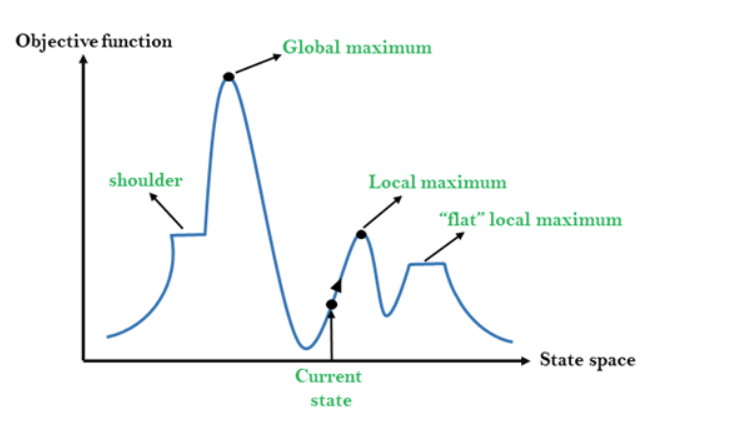
    
    Different regions in the state space landscape:
    ----------------------------------------------
    
    Local Maximum: Local maximum is a state which is better than its neighbor states, but there is also another state which is higher than it.

    Global Maximum: Global maximum is the best possible state of state space landscape. It has the highest value of objective function.

    Current state: It is a state in a landscape diagram where an agent is currently present.

    Flat local maximum: It is a flat space in the landscape where all the neighbor states of current states have the same value.

    Shoulder: It is a plateau region which has an uphill edge.
    
#### Types of Hill Climbing Algorithm:
       -> Simple hill Climbing:
       -> Steepest-Ascent hill-climbing:
       -> Stochastic hill Climbing:    
       
      1. Simple Hill Climbing:
      -------------------------
            Simple hill climbing is the simplest way to implement a hill climbing algorithm. It only evaluates the neighbor node state at a time and selects the first one which optimizes current cost and set it as a current state. It only checks it's one successor state, and if it finds better than the current state, then move else be in the same state. This algorithm has the following features:
              ->  Less time consuming
               -> Less optimal solution and the solution is not guaranteed
               
    Algorithm for Simple Hill Climbing:
    -------------------------------------
    Step 1: Evaluate the initial state, if it is goal state then return success and Stop.
    Step 2: Loop Until a solution is found or there is no new operator(prameters or hyperparameters) left to apply.
    Step 3: Select and apply an operator to the current state.
    Step 4: Check new state
            If it is goal state, then return success and quit.
            Else if it is better than the current state then assign new state as a current state.
            Else if not better than the current state, then return to step2.
    Step 5: Exit.

    2. Steepest-Ascent hill climbing:
    -----------------------------------
        The steepest-Ascent algorithm is a variation of simple hill climbing algorithm. This algorithm examines all the neighboring nodes of the current state and selects one neighbor node which is closest to the goal state. This algorithm consumes more time as it searches for multiple neighbors

    Algorithm for Steepest-Ascent hill climbing:
    --------------------------------------------
    Step 1: Evaluate the initial state, if it is goal state then return success and stop, else make current state as initial state.
    Step 2: Loop until a solution is found or the current state does not change.
            Let SUCC be a state such that any successor of the current state will be better than it.
            For each operator that applies to the current state:
            Apply the new operator and generate a new state.
            Evaluate the new state.
            If it is goal state, then return it and quit, else compare it to the SUCC.
            If it is better than SUCC, then set new state as SUCC.
            If the SUCC is better than the current state, then set current state to SUCC.
    Step 3: Exit.
    
    3. Stochastic hill climbing:
    ----------------------------
    Stochastic hill climbing does not examine for all its neighbor before moving. Rather, this search algorithm selects one neighbor node at random and decides whether to choose it as a current state or examine another state.
    
    Problems in Hill Climbing Algorithm:
    ------------------------------------
    1. Local Maximum: A local maximum is a peak state in the landscape which is better than each of its neighboring states, but there is another state also present which is higher than the local maximum. 

    Solution: Backtracking technique can be a solution of the local maximum in state space landscape. Create a list of the promising path so that the algorithm can backtrack the search space and explore other paths as well.
    
    2. Plateau: A plateau is the flat area of the search space in which all the neighbor states of the current state contains the same value, because of this algorithm does not find any best direction to move. A hill-climbing search might be lost in the plateau area.(---^)

    Solution: The solution for the plateau is to take big steps or very little steps while searching, to solve the problem. Randomly select a state which is far away from the current state so it is possible that the algorithm could find non-plateau region.

    3. Ridges: A ridge is a special form of the local maximum. It has an area which is higher than its surrounding areas, but itself has a slope, and cannot be reached in a single move. (^^^^^^)

    Solution: With the use of bidirectional search, or by moving in different directions, we can improve this problem.

    ---------------------
    Simulated Annealing:
    ---------------------
    A hill-climbing algorithm which never makes a move towards a lower value guaranteed to be incomplete because it can get stuck on a local maximum. And if algorithm applies a random walk, by moving a successor, then it may complete but not efficient. Simulated Annealing is an algorithm which yields both efficiency and completeness.

    In mechanical term Annealing is a process of hardening a metal or glass to a high temperature then cooling gradually, so this allows the metal to reach a low-energy crystalline state. The same process is used in simulated annealing in which the algorithm picks a random move, instead of picking the best move. If the random move improves the state, then it follows the same path. Otherwise, the algorithm follows the path which has a probability of less than 1 or it moves downhill and chooses another path.

#### Caveats of Profiler:
    Using profiler with Tensorflow models may not produce what you would expect, especially if you have written your own custom layer or custom function for the model. If you did it correctly, Tensorflow is supposed to build the computation graph before your model is executed, and hence the logic will be changed. The profiler output will therefore not show your custom classes.

    It’s the same for some advanced modules that involve binary code. The profiler can see you called some functions and marked them as “built-in” methods, but it cannot go any further into the compiled code.
    
    Below is a short code of the "LeNet5 model for the MNIST classification" problem. If you try to profile it and print the top 15 rows, you will see that a wrapper is occupying the majority of the time, and nothing can be shown beyond that.
    
    In the result below, the TFE_Py_Execute is marked as a “built-in” method, and it consumes 48.159 sec out of the total run time of 55.715 sec. Note that the tottime is the same as the cumtime, meaning from the profiler’s perspective, it seems all time is spent at this function, and it doesn’t call any other functions. This illustrates the limitation of Python’s profiler.

In [11]:
# LeNet5 model for MNIST dataset with profiling
from cProfile import Profile
import pstats

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, AveragePooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ndarray size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# Load and reshape data to shape of (n_sample, height, width, n_channel)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#normalizing the pixel values from 0 to 255 to 0 to 1 for faster compution
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)
# Reshape data to (n_samples, height, width, n_channel)
X_train = np.expand_dims(X_train, axis=3).astype('float32') 
X_test = np.expand_dims(X_test, axis=3).astype('float32')
print(X_train.shape)
#we expand the dimensions of the training and test dataset.
#The reason we do this is that during the training and evaluation phases,
#the network expects the images to be presented within batches;
#the extra dimension is representative of the numbers of images in a batch.

val_x = X_train[:5000]
val_y = y_train[:5000]

# One-hot encode the output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
val_y = to_categorical(val_y)

# LeNet5 model
lenet_5_model = Sequential([
    Conv2D(6, kernel_size=(5,5), strides=1, input_shape=X_train[0].shape, padding="same", activation="tanh"), #C1
#     AveragePooling2D((2,2), strides=2), #S2
    AveragePooling2D(),
    Conv2D(16, kernel_size=(5,5), strides=1, activation="tanh", padding='valid'), #C3
#     AveragePooling2D((2,2), strides=2), #S4
    AveragePooling2D(),
    Conv2D(120, kernel_size=(5,5), strides=1, activation="tanh", padding='valid'), #C5
    Flatten(), #Flatten
    Dense(84, activation="tanh"), #F6
    Dense(10, activation="softmax") #Output layer
])
lenet_5_model.summary(line_length=100)

#Enabling the profiler
prof = Profile()
prof.enable()

# Training the model
lenet_5_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
earlystopping = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
lenet_5_model.fit(X_train, y_train, validation_data=(val_x, val_y), epochs=10, batch_size=32, callbacks=[earlystopping])

# Evaluate
print(lenet_5_model.evaluate(X_test, y_test, verbose=0))

#Disabling the profiler
prof.disable()
# print profiling output
stats = pstats.Stats(prof).strip_dirs().sort_stats("cumtime")
stats.print_stats(20) # top 20 rows

(60000, 28, 28)
(60000, 28, 28, 1)
Model: "sequential_2"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
conv2d_6 (Conv2D)                            (None, 28, 28, 6)                       156            
____________________________________________________________________________________________________
average_pooling2d_4 (AveragePooling2D)       (None, 14, 14, 6)                       0              
____________________________________________________________________________________________________
conv2d_7 (Conv2D)                            (None, 10, 10, 16)                      2416           
____________________________________________________________________________________________________
average_pooling2d_5 (AveragePooling2D)       (None, 5, 5, 16)                        0              
__________________________________

#### LeNet - 5 CNN architecture
    
    LeNet-5 CNN architecture is made up of 7 layers. The layer composition consists of 3 convolutional layers, 2 subsampling layers and 2 fully connected layers.
    
    The first layer is the input layer — this is generally not considered a layer of the network as nothing is learnt in this layer. The input layer is built to take in 32x32, and these are the dimensions of images that are passed into the next layer. If we are familiar with the MNIST dataset, we will be aware that the MNIST dataset images have the dimensions 28x28. To get the MNIST images dimension to the meet the requirements of the input layer, the 28x28 images are padded.
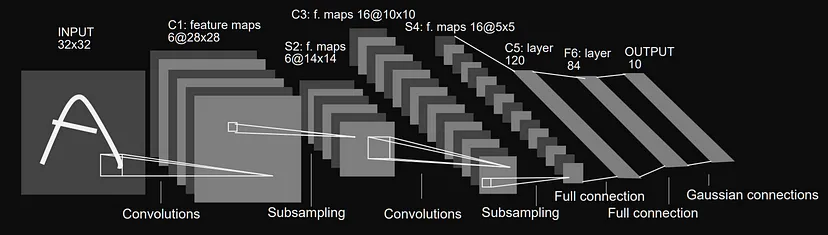
      
     The grayscale images used in the research paper of LeNet had their pixel values normalized from 0 to 255, to values between -0.1 and 1.175. The reason for normalization is to ensure that the batch of images have a mean of 0 and a standard deviation of 1, the benefits of this is seen in the reduction in the amount of training time. In the image classification with LeNet-5 example above, we’ll be normalizing the pixel values of the images to take on values between 0 to 1.

    Convolutional Neural Networks (CNN) have characteristics that enable invariance to the affine transformations of images that are fed through the network. This provides the ability to recognize patterns that are shifted, tilted or slightly warped within images.
    These characteristics of affine invariance are introduced due to three main properties of the CNN architecture.
            - Local Receptive Fields
            - Shared Weights (parameter sharing)
            - Spatial Sub-sampling/ Downsampling (Average pooling, max-pooling)

        https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342

### Static Analyzers
    Static analyzers are tools that help you check your code without really running your code. The most basic form of static analyzers is the syntax highlighters in your favorite editors . In Python, we have some tools like PyLint, Flake8, mypy to identify potential errors or point out pep8 violations of coding standards.
    
#### PyLint
    Lint was the name of a static analyzer for C created a long time ago. Pylint borrowed its name and is one of the most widely used static analyzers. It is available as a Python package, and we can install it with pip. Pylint can check one script or the entire directory.
    
                    pip install pylint
                    
             To check the code with pylint, we have run the command "pylint programname" in the terminal
                    
    If you provide the root directory of a module to Pylint, all components of the module will be checked by Pylint. In that case, you will see the path of different files at the beginning of each line.
    
    Pylint may give false positives. For example, Pylint flags the import from tensorflow.keras.datasets as an error. It is caused by an optimization in the Tensorflow package that not everything would be scanned and loaded by Python when we import Tensorflow, but a LazyLoader is created to help load only the necessary part of a large package. This saves significant time in starting the program, but it also confuses Pylint in that we seem to import something that doesn’t exist.

    Furthermore, one of the key feature of Pylint is to help us make our code align with the PEP8 coding style. When we define a function without a docstring, for instance, Pylint will complain that we didn’t follow the coding convention even if the code is not doing anything wrong.

    But the most important use of Pylint is to help us identify potential issues. For example, we misspelled y_train as Y_train with an uppercase Y. Pylint will tell us that we are using a variable without assigning any value to it. It is not straightforwardly telling us what went wrong, but it definitely points us to the right spot to proofread our code. Similarly,  Pylint also tells us that there is a variable of the same name at the outer scope if there are 2 variable with different scopes.  Similarly, unused imports may be just that we misspelled the name of the modules. All these are hints provided by Pylint. We still have to use our judgement to correct our code (or ignore Pylint’s complaints).

    But if you know what Pylint should stop complaining about, you can request to ignore those. For example, we know the import statements are fine, so we can invoke Pylint with:
                pylint -d E0611 lenet5-notworking.py 
        Here E0611 is the error code specified by pylint for a particular error
                pylint -d E0611,C0301 lenet5-notworking.py  #disabling multiple codes
                
        If you want to disable some issues on only a specific line or a specific part of the code, you can put special comments to your code, as follows:
                       --------------------------------------------------------------
                        
                 from tensorflow.keras.datasets import mnist  # pylint: disable=no-name-in-module
                 from tensorflow.keras.models import Sequential # pylint: disable=E0611
                 from tensorflow.keras.layers import Conv2D, Dense, AveragePooling2D, Dropout, Flatten
                 from tensorflow.keras.utils import to_categorical
                 --------------------------------------------------------------
                 
        The magic keyword pylint: will introduce Pylint-specific instructions. The code E0611 and the name no-name-in-module are the same. In the example above, Pylint will complain about the last two import statements but not the first two because of those special comments.
        
#### Flake 8:
    The tool Flake8 is indeed a wrapper over PyFlakes, McCabe, and pycodestyle. When you install flake8 with:
                                        pip install flake8
        you will install all these dependencies.

        Similar to Pylint, we have the command flake8 after installing this package, and we can pass in a script or a directory for analysis. But the focus of Flake8 is inclined toward coding style. Hence we would see the following output for the same lenet code as below
        
        flake8 lenet5-notworking.py
        
        --------------------------------------------------------------
        lenet5-notworking.py:2:1: F401 'h5py' imported but unused
        lenet5-notworking.py:3:1: F401 'tensorflow as tf' imported but unused
        lenet5-notworking.py:6:1: F401 'tensorflow.keras.layers.Dropout' imported but unused
        lenet5-notworking.py:6:80: E501 line too long (85 > 79 characters)
        lenet5-notworking.py:18:26: F821 undefined name 'y_train'
        lenet5-notworking.py:19:25: F821 undefined name 'y_test'
        lenet5-notworking.py:22:1: E302 expected 2 blank lines, found 1
        lenet5-notworking.py:24:21: E231 missing whitespace after ','
        lenet5-notworking.py:24:41: E231 missing whitespace after ','
        lenet5-notworking.py:24:44: E231 missing whitespace after ','
        lenet5-notworking.py:24:80: E501 line too long (87 > 79 characters)
        lenet5-notworking.py:25:28: E231 missing whitespace after ','
        lenet5-notworking.py:26:22: E231 missing whitespace after ','
        lenet5-notworking.py:27:28: E231 missing whitespace after ','
        lenet5-notworking.py:28:23: E231 missing whitespace after ','
        lenet5-notworking.py:36:1: E305 expected 2 blank lines after class or function definition, found 1
        lenet5-notworking.py:36:21: F821 undefined name 'tanh'
        lenet5-notworking.py:37:80: E501 line too long (86 > 79 characters)
        lenet5-notworking.py:38:80: E501 line too long (88 > 79 characters)
        lenet5-notworking.py:39:80: E501 line too long (115 > 79 characters)
        --------------------------------------------------------------
        
      The error codes beginning with letter E are from pycodestyle, and those beginning with letter F are from PyFlakes. We can see it complains about coding style issues such as the use of (5,5) for not having a space after the comma. We can also see it can identify the use of variables before assignment. But it does not catch some code smells such as the function createmodel()that reuses the variable model that was already defined in outer scope.
      
      Similar to Pylint, we can also ask Flake8 to ignore some complaints. For example,

        flake8 --ignore E501,E231 lenet5-notworking.py
        
        Those lines will not be printed in the output:
        --------------------------------------------------------------
        lenet5-notworking.py:2:1: F401 'h5py' imported but unused
        lenet5-notworking.py:3:1: F401 'tensorflow as tf' imported but unused
        lenet5-notworking.py:6:1: F401 'tensorflow.keras.layers.Dropout' imported but unused
        lenet5-notworking.py:18:26: F821 undefined name 'y_train'
        lenet5-notworking.py:19:25: F821 undefined name 'y_test'
        lenet5-notworking.py:22:1: E302 expected 2 blank lines, found 1
        lenet5-notworking.py:36:1: E305 expected 2 blank lines after class or function definition, found 1
        lenet5-notworking.py:36:21: F821 undefined name 'tanh'
        --------------------------------------------------------------
        
        We can also use magic comments to disable some complaints, e.g.,

        ...
        import tensorflow as tf  # noqa: F401
        from tensorflow.keras.datasets import mnist
        from tensorflow.keras.models import Sequential
        
        Flake8 will look for the comment # noqa: to skip some complaints on those particular lines.
        
#### Mypy
    Python is not a typed language so, unlike C or Java, you do not need to declare the types of some functions or variables before use. But lately, Python has introduced type hint notation, so we can specify what type a function or variable intended to be without enforcing its compliance like a typed language.
    
    One of the biggest benefits of using type hints in Python is to provide additional information for static analyzers to check. Mypy is the tool that can understand type hints. Even without type hints, Mypy can still provide complaints similar to Pylint and Flake8.

            We can install Mypy from PyPI:
                        pip install mypy
        Then the example above can be provided to the mypy command:
        
                mypy lenet5-notworking.py
               ---------------------------------------------------------------------------- 
                
                lenet5-notworking.py:2: error: Skipping analyzing "h5py": module is installed, but missing library stubs or py.typed marker
                lenet5-notworking.py:2: note: See https://mypy.readthedocs.io/en/stable/running_mypy.html#missing-imports
                lenet5-notworking.py:3: error: Skipping analyzing "tensorflow": module is installed, but missing library stubs or py.typed marker
                lenet5-notworking.py:4: error: Skipping analyzing "tensorflow.keras.datasets": module is installed, but missing library stubs or py.typed marker
                lenet5-notworking.py:5: error: Skipping analyzing "tensorflow.keras.models": module is installed, but missing library stubs or py.typed marker
                lenet5-notworking.py:6: error: Skipping analyzing "tensorflow.keras.layers": module is installed, but missing library stubs or py.typed marker
                lenet5-notworking.py:7: error: Skipping analyzing "tensorflow.keras.utils": module is installed, but missing library stubs or py.typed marker
                lenet5-notworking.py:8: error: Skipping analyzing "tensorflow.keras.callbacks": module is installed, but missing library stubs or py.typed marker
                lenet5-notworking.py:18: error: Cannot determine type of "y_train"
                lenet5-notworking.py:19: error: Cannot determine type of "y_test"
                lenet5-notworking.py:36: error: Name "tanh" is not defined
                Found 10 errors in 1 file (checked 1 source file)
                ---------------------------------------------------------------------------------
                
                We see similar errors as Pylint above, although sometimes not as precise (e.g., the issue with the variable y_train). However we see one characteristic of mypy above: It expects all libraries we used to come with a stub so the type checking can be done. This is because type hints are optional. In case the code from a library does not provide type hints, the code can still work, but mypy cannot verify. Some of the libraries have typing stubs available that enables mypy to check them better. Example using mypy in the below cell

In [12]:
!pip install mypy

In [ ]:
#For example, if we have the following script saved as lenet5-notworking.py, We can ask Pylint to tell us how good our code is before even running it
# pylint lenet5-notworking.py
#flake8 lenet5-notworking.py
import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, AveragePooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
 
# Load MNIST digits
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
 
# Reshape data to (n_samples, height, wiedth, n_channel)
X_train = np.expand_dims(X_train, axis=3).astype("float32")
X_test = np.expand_dims(X_test, axis=3).astype("float32")
 
# One-hot encode the output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
 
# LeNet5 model
def createmodel(activation):
    model = Sequential([
        Conv2D(6, (5,5), input_shape=(28,28,1), padding="same", activation=activation),
        AveragePooling2D((2,2), strides=2),
        Conv2D(16, (5,5), activation=activation),
        AveragePooling2D((2,2), strides=2),
        Conv2D(120, (5,5), activation=activation),
        Flatten(),
        Dense(84, activation=activation),
        Dense(10, activation="softmax")
    ])
    return model
 
# Train the model
model = createmodel(tanh)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
earlystopping = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[earlystopping])
 
# Evaluate the model
print(model.evaluate(X_test, y_test, verbose=0))
model.save("lenet5.h5")

In [ ]:
#example to show the usage of mypy with function having the type information as stub
import h5py
 
def dumphdf5(filename: str) -> int: #specifying the type of filename and return type of the function
    """Open a HDF5 file and print all the dataset and attributes stored
 
    Args:
        filename: The HDF5 filename
 
    Returns:
        Number of dataset found in the HDF5 file
    """
    count: int = 0
 
    def recur_dump(obj) -> None: #specifiying the return type hint
        print(f"{obj.name} ({type(obj).__name__})")
        if obj.attrs.keys():
            print("\tAttribs:")
            for key in obj.attrs.keys():
                print(f"\t\t{key}: {obj.attrs[key]}")
        if isinstance(obj, h5py.Group):
            # Group has key-value pairs
            for key, value in obj.items():
                recur_dump(value)
        elif isinstance(obj, h5py.Dataset):
            count += 1
            print(obj[()])
 
    with h5py.File(filename) as obj:
        recur_dump(obj)
        print(f"{count} dataset found")

with open("my_model.h5") as fp:
    dumphdf5(fp)

    This program is supposed to load a HDF5 file (such as a Keras model) and print every attribute and data stored in it. We used the h5py module (which does not have a typing stub, and hence mypy cannot identify the types it used), but we added type hints to the function we defined, dumphdf5(). This function expects the filename of a HDF5 file and prints everything stored inside. At the end, the number of datasets stored will be returned.

    When we save this script into dumphdf5.py and pass it into mypy, we will see the following:
                mypy dumphdf5.py
    ----------------------------------------------------------------------------------------------------------
    dumphdf5.py:1: error: Skipping analyzing "h5py": module is installed, but missing library stubs or py.typed marker
    dumphdf5.py:1: note: See https://mypy.readthedocs.io/en/stable/running_mypy.html#missing-imports
    dumphdf5.py:3: error: Missing return statement
    dumphdf5.py:33: error: Argument 1 to "dumphdf5" has incompatible type "TextIO"; expected "str"
    Found 3 errors in 1 file (checked 1 source file)
    ----------------------------------------------------------------------------------------------------------
    
    We misused our function so that an opened file object is passed into dumphdf5() instead of just the filename (as a string). Mypy can identify this error. We also declared that the function should return an integer, but we didn’t have the return statement in the function.

    However, there is one more error in this code that mypy didn’t identify. Namely, the use of the variable count in the inner function recur_dump() should be declared nonlocal because it is defined out of scope. This error can be caught by Pylint and Flake8, but mypy missed it.

    The following is the complete, corrected code with no more errors. Note that we added the magic comment “# type: ignore” at the first line to mute the typing stubs warning from mypy

In [13]:
import h5py # type: ignore
 

def dumphdf5(filename: str) -> int:
    """Open a HDF5 file and print all the dataset and attributes stored
 
    Args:
        filename: The HDF5 filename
 
    Returns:
        Number of dataset found in the HDF5 file
    """
    count: int = 0
 
    def recur_dump(obj) -> None:
        nonlocal count
        print(f"{obj.name} ({type(obj).__name__})")
        if obj.attrs.keys():
            print("\tAttribs:")
            for key in obj.attrs.keys():
                print(f"\t\t{key}: {obj.attrs[key]}")
        if isinstance(obj, h5py.Group):
            # Group has key-value pairs
            for key, value in obj.items():
                recur_dump(value)
        elif isinstance(obj, h5py.Dataset):
            count += 1
            print(obj[()])
 
    with h5py.File(filename) as obj:
        recur_dump(obj)
        print(f"{count} dataset found")
    return count
 
dumphdf5("my_model.h5")

/ (File)
0 dataset found


C:\Users\malla\AppData\Local\Temp\ipykernel_8512\806517190.py:30: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(filename) as obj:


0